# Importing Libraries for Data Analysis, Visualization, and Modeling

- `pandas` and `numpy`: Data manipulation and numerical operations.
- `matplotlib.pyplot` and `seaborn`: Visualization tools for data plotting.

## Machine Learning Libraries

- `train_test_split`: Splits data for training and testing.
- `LinearRegression`, `Ridge`, `Lasso`: Linear regression models with regularization options.
- `DecisionTreeRegressor`, `RandomForestRegressor`: Tree-based regression models.
- `SVR`, `KNeighborsRegressor`: Support Vector and K-Nearest Neighbors regressors.

## Evaluation Metrics

- `mean_squared_error`, `mean_absolute_error`, `r2_score`: Metrics to evaluate model performance.

## Statistical Tools

- `linear_rainbow`: Diagnostic test for model assumptions.
- `statsmodels.api`: Advanced statistical functions.

## Warnings

- `warnings.filterwarnings('ignore')`: Suppresses warnings for cleaner output.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
import warnings
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
df.shape

(244, 7)

In [31]:
df.dropna(inplace=True)

In [32]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


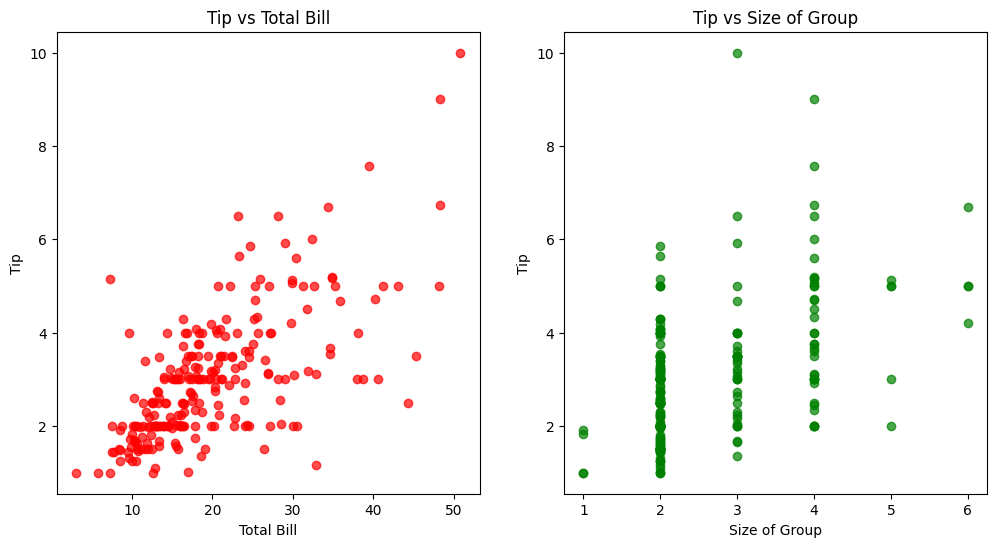

In [33]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
plt.scatter(df['total_bill'], df['tip'], color='red', alpha=0.7)  
plt.title('Tip vs Total Bill')  
plt.xlabel('Total Bill')  
plt.ylabel('Tip')  
plt.subplot(1, 2, 2)  
plt.scatter(df['size'], df['tip'], color='green', alpha=0.7)  
plt.title('Tip vs Size of Group')  
plt.xlabel('Size of Group')
plt.ylabel('Tip')

plt.show()


In [34]:
data = pd.get_dummies(df, drop_first=True)

In [35]:
data.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


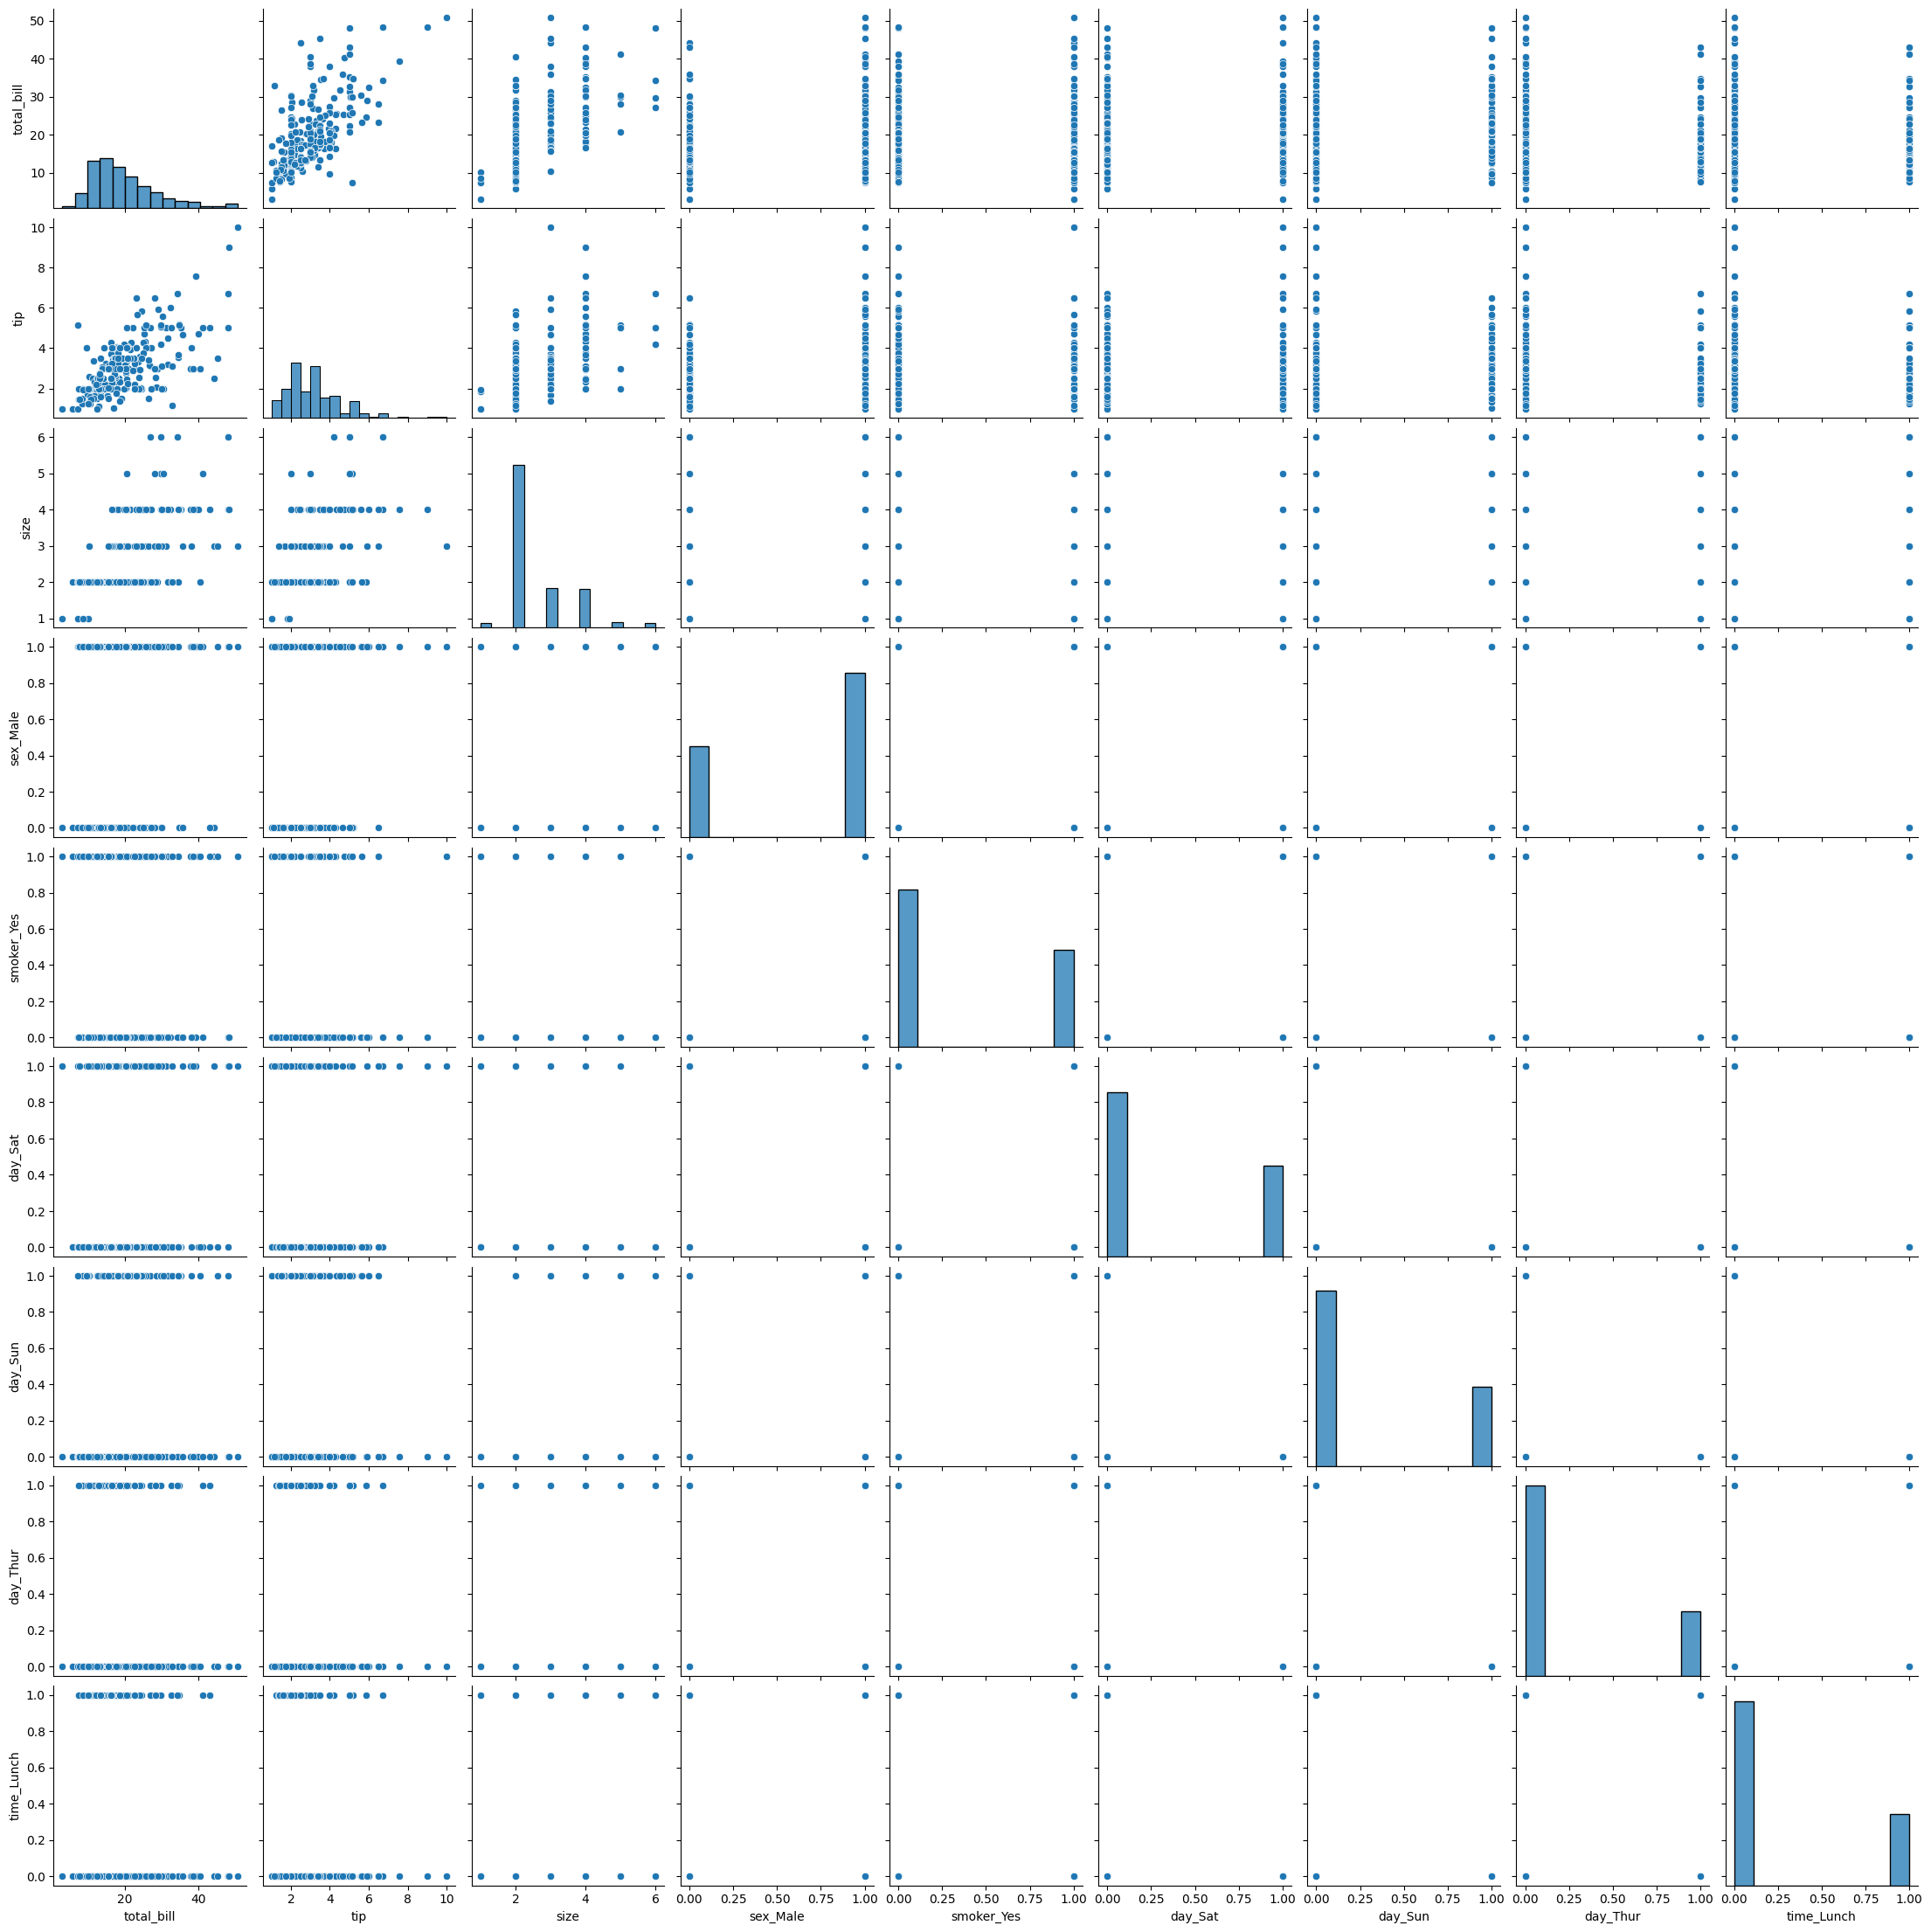

In [36]:
sns.pairplot(data, palette='red')
plt.show()

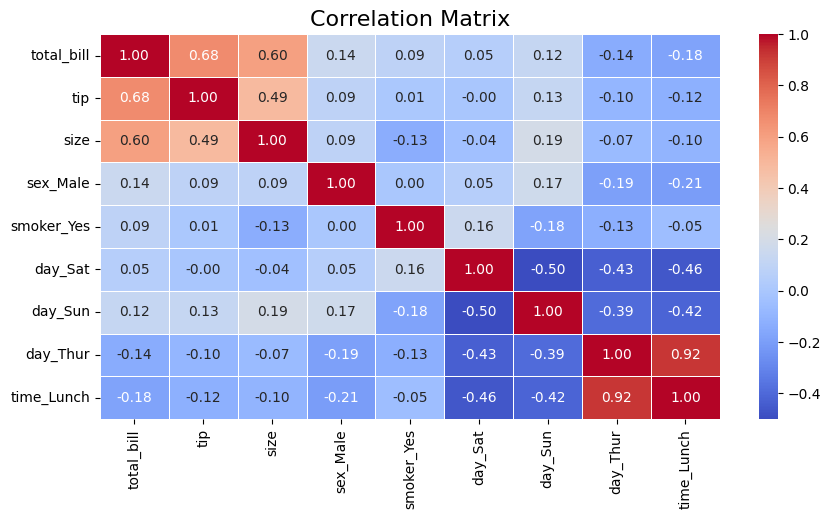

In [37]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [38]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

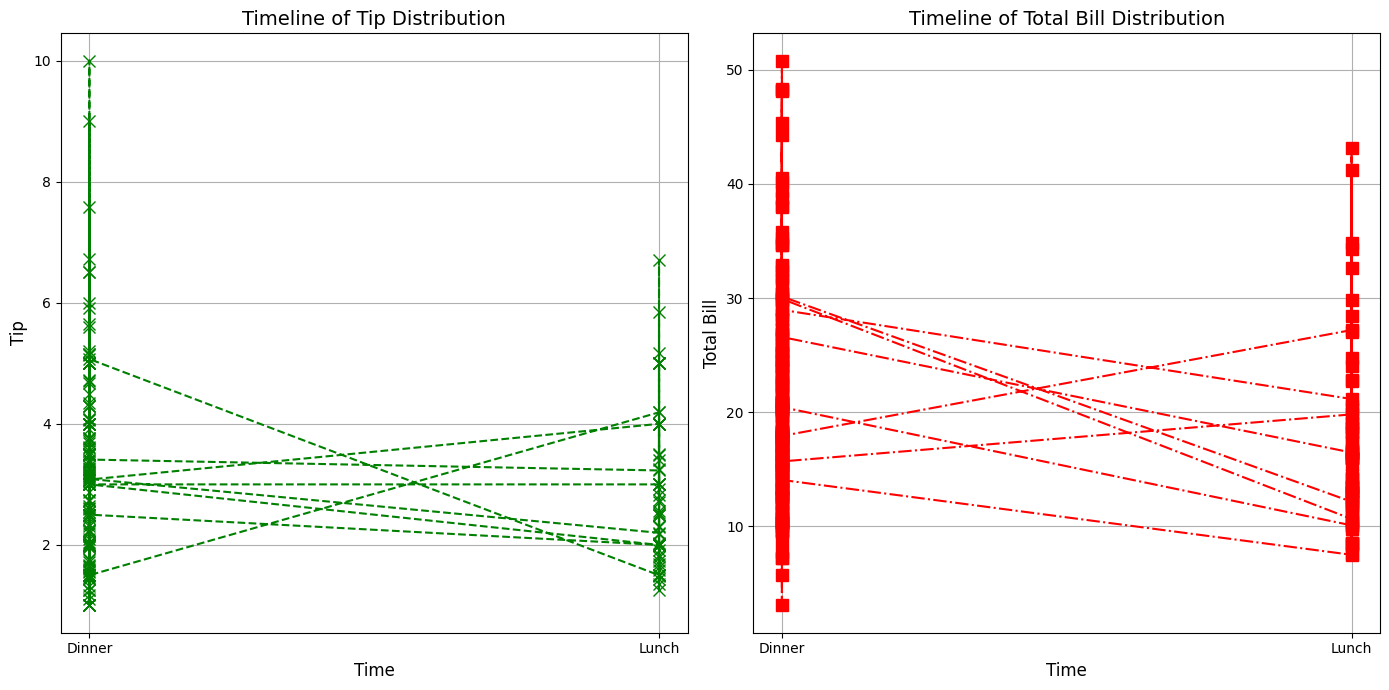

In [39]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.plot(df['time'], df['tip'], marker='x', linestyle='--', color='g', markersize=8)
plt.title('Timeline of Tip Distribution', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Tip', fontsize=12)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(df['time'], df['total_bill'], marker='s', linestyle='-.', color='r', markersize=8)
plt.title('Timeline of Total Bill Distribution', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Bill', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


In [40]:
X = data.drop('tip', axis=1)
y = data['tip']


X = X.astype(float)
y = y.astype(float)


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


rainbow_stat, rainbow_p_value = linear_rainbow(model)


print(f"Rainbow test statistic: {rainbow_stat:.4f}")
print(f"Rainbow test p-value: {rainbow_p_value:.4f}")


if rainbow_p_value < 0.05:
    print("Significant deviation from linearity.")
else:
    print("No significant deviation from linearity.")


Rainbow test statistic: 1.1971
Rainbow test p-value: 0.1659
No significant deviation from linearity.


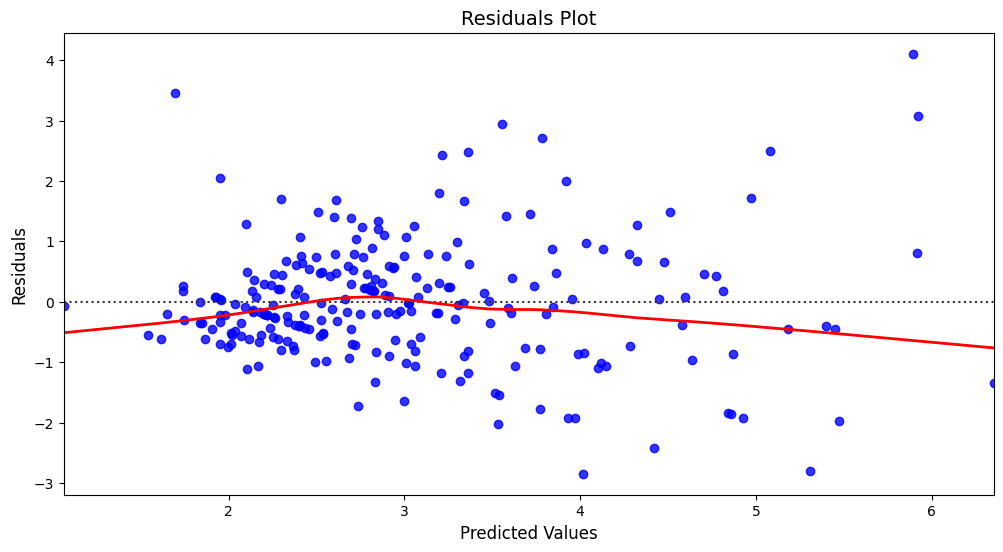

In [41]:
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(12,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residuals Plot", fontsize=14)
plt.show()

The residual plot is randomly distributed along the X-axis, which indicates that there are no systematic patterns or trends in the residuals. A well-behaved residual plot should show a scatter of points that are evenly distributed around the horizontal axis with no clear patterns, such as curves or clustering. 

In this case, the lack of any significant structure in the residuals suggests that the linear regression model is a good fit for the data. The absence of non-random behavior implies that the assumption of linearity is valid, and the model has captured the underlying relationship between the predictor variables and the target variable ('tip'). Therefore, there is no indication of model misspecification or non-linearity.


In [42]:

X = data.drop('tip', axis=1)
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred_lr_model=lr_model.predict(X_test)

print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr_model))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr_model))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr_model))

Linear Regression MAE: 0.6671331480264893
Linear Regression MSE: 0.7033566017436105
Linear Regression R2: 0.43730181943482505


The errors in the model are relatively high, and the R² score is low, which indicates that the linear regression model is not performing well for this dataset. The R² score, also known as the coefficient of determination, is a key metric that tells us how well the independent variables (predictors) explain the variance in the dependent variable ('tip'). A low R² score suggests that the model is not capturing much of the variance in the target variable, implying a poor fit.

In addition to the low R², the high errors (residuals) suggest that the model's predictions are far from the actual values. This could indicate that the relationship between the predictors and the target variable is not linear or that there are other important variables not included in the model.

Given these issues, linear regression might not be the best choice for this dataset. It may be necessary to explore other models that can better handle the underlying complexities, such as polynomial regression, decision trees, random forests, or other machine learning algorithms that can capture non-linear relationships and interactions between variables more effectively. Additionally, feature engineering or the inclusion of more relevant variables could improve the model's performance.


In [44]:


ridge = Ridge()
lasso = Lasso()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,700]}

ridge_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)

print(f"Best alpha for Ridge: {ridge_search.best_params_['alpha']}")
print(f"Best alpha for Lasso: {lasso_search.best_params_['alpha']}")


Best alpha for Ridge: 700
Best alpha for Lasso: 0.1


In [45]:
# Ridge Regression
ridge = Ridge(alpha=700.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))

Ridge Regression MAE: 0.6291820390384674
Ridge Regression MSE: 0.5764291106075974
Ridge Regression R2: 0.5388461401234816
Lasso Regression MAE: 0.6374841046500827
Lasso Regression MSE: 0.5908528649971524
Lasso Regression R2: 0.5273068720881755


Both Ridge and Lasso regression perform similarly, and their performance is better than linear regression. This suggests that regularization helps improve model accuracy by reducing overfitting and handling multicollinearity more effectively than linear regression.

In [46]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

Decision Tree MAE: 0.8295918367346939
Decision Tree MSE: 1.2551938775510205
Decision Tree R2: -0.004178121600921791


The model is a poor fit, with high MAE and MSE values, and a negative R² score, indicating it performs worse than a simple mean model and fails to capture the data's trends.

In [47]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest MAE: 0.7557163265306125
Random Forest MSE: 0.9196720148979602
Random Forest R2: 0.2642455218065466


Random Forest combines multiple decision trees (usually 100 or more) to make predictions, improving accuracy and stability compared to a single decision tree. However, despite this advantage, the performance is still not optimal in this case. This could be due to the nature of the dataset, where the complexity of the Random Forest model may not align well with the underlying patterns, or overfitting might still occur, leading to subpar results. In such cases, simpler models like SVR might perform better.

In [48]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("SVR MAE:", mean_absolute_error(y_test, y_pred_svr))
print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR R2:", r2_score(y_test, y_pred_svr))

SVR MAE: 0.5679864502285389
SVR MSE: 0.5323763062616395
SVR R2: 0.5740891915042663


In [49]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN MAE:", mean_absolute_error(y_test, y_pred_knn))
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))
print("KNN R2:", r2_score(y_test, y_pred_knn))

KNN MAE: 0.718857142857143
KNN MSE: 0.8763725714285714
KNN R2: 0.29888587066985495


After evaluating all the regression models, we conclude that the Support Vector Regression (SVR) is the best fit for this dataset, as it provides the most accurate predictions. Ridge and Lasso regression models also perform well, though not as effectively as SVR. On the other hand, Decision Tree and Random Forest regressions are the worst fit, likely due to overfitting or the complexity of these models not being suitable for the dataset's structure.

**Insights for Management**

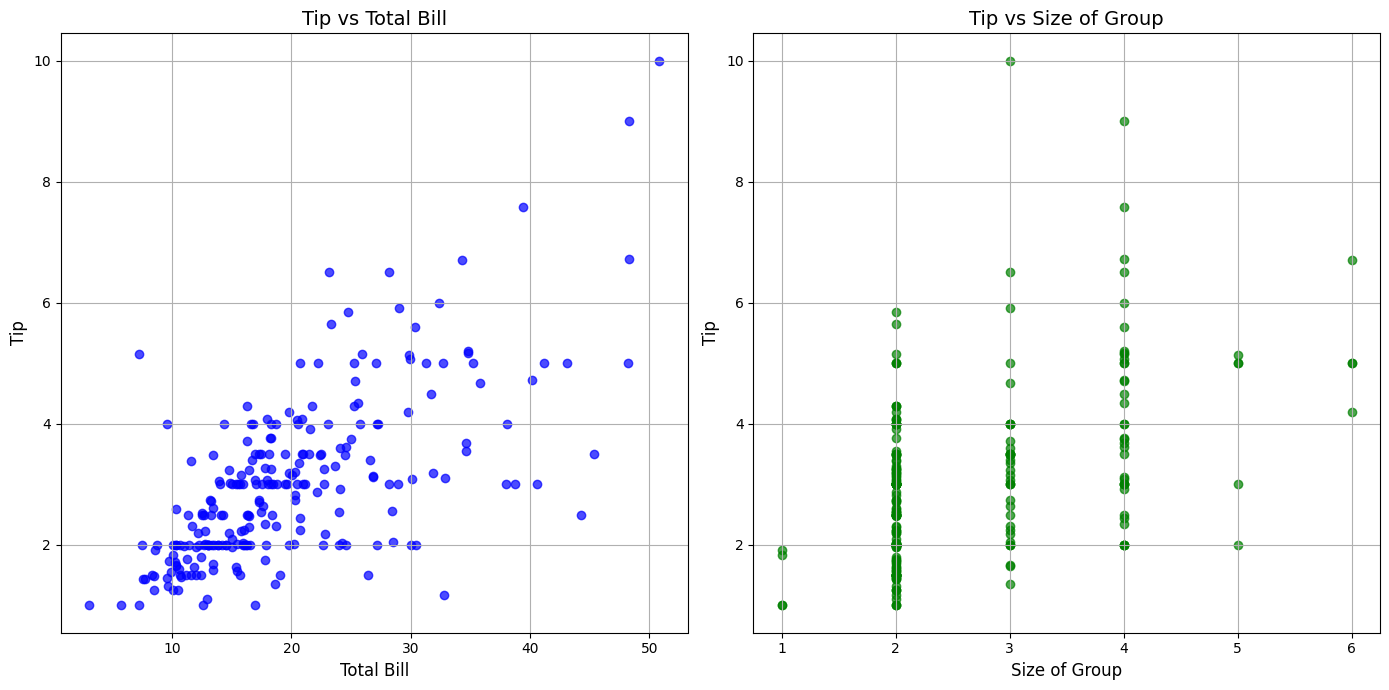

In [50]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.scatter(df['total_bill'], df['tip'], color='blue', alpha=0.7)
plt.title('Tip vs Total Bill', fontsize=14)
plt.xlabel('Total Bill', fontsize=12)
plt.ylabel('Tip', fontsize=12)
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(df['size'], df['tip'], color='green', alpha=0.7)
plt.title('Tip vs Size of Group', fontsize=14)
plt.xlabel('Size of Group', fontsize=12)
plt.ylabel('Tip', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


The most frequent tip amount ranges between 2 to 4, indicating a common tipping behavior in this range. Higher tips are generally given for bills over 25, suggesting that larger bills lead to more generous tipping. Groups of 4 people tend to give the highest tips, while groups of 3 and 2 give almost the same amount. Interestingly, a single person gives the least tip, which may reflect smaller individual bills and the absence of group dynamics to influence tipping behavior.

In [51]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

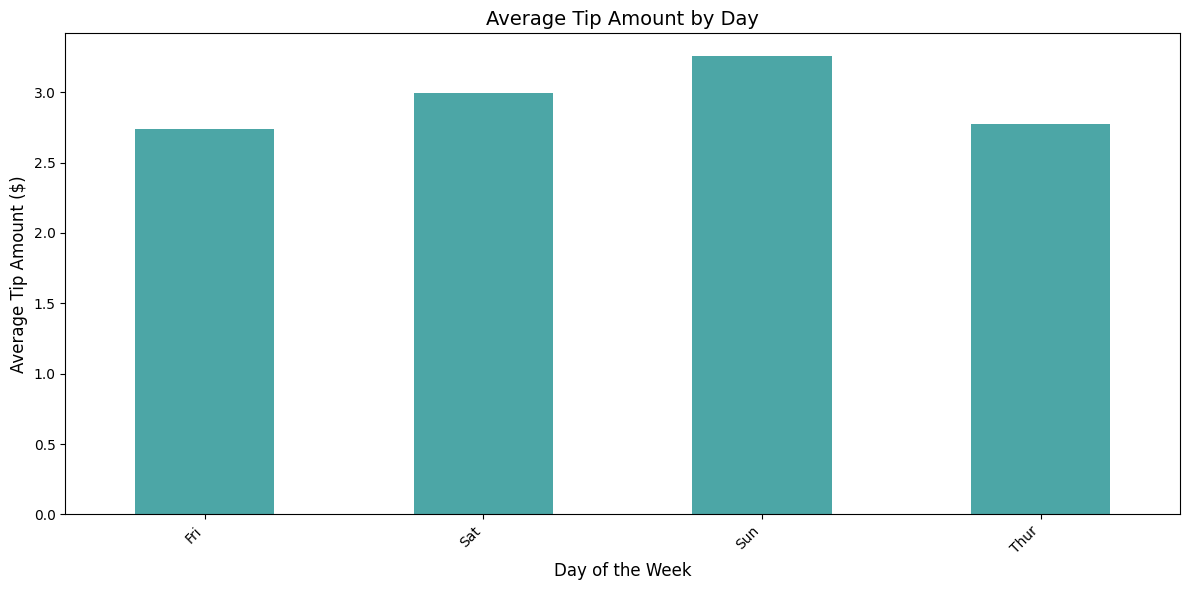

In [52]:
avg_tip_per_day = df.groupby('day')['tip'].mean().sort_index()

plt.figure(figsize=(12, 6))
avg_tip_per_day.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Average Tip Amount by Day', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Tip Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


The maximum tip is given on Sundays, followed by Saturdays, suggesting that customers are more generous on weekends. This could be due to factors like higher socializing or spending on weekends. On weekdays, the tip amounts are relatively consistent, indicating less variation in customer behavior during the workweek.

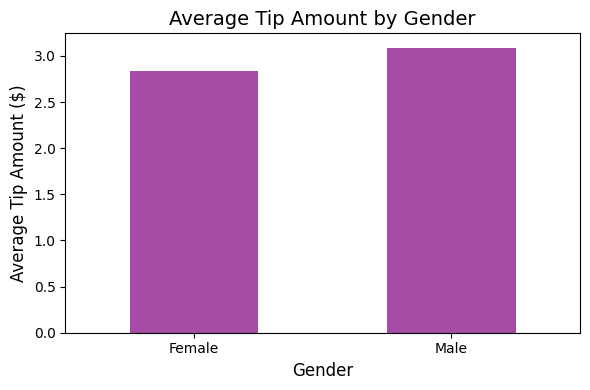

In [53]:
avg_tip_by_gender = df.groupby('sex')['tip'].mean()

plt.figure(figsize=(6, 4))
avg_tip_by_gender.plot(kind='bar', color='purple', alpha=0.7)  
plt.title('Average Tip Amount by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Tip Amount ($)', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()


Male customers tend to give higher tips than females, possibly due to cultural norms, larger spending behaviors, or psychological factors. Males may spend more on meals, leading to higher tips, or feel a greater societal expectation to tip generously. Additionally, demographic factors like dining at higher-end restaurants could contribute to this trend.

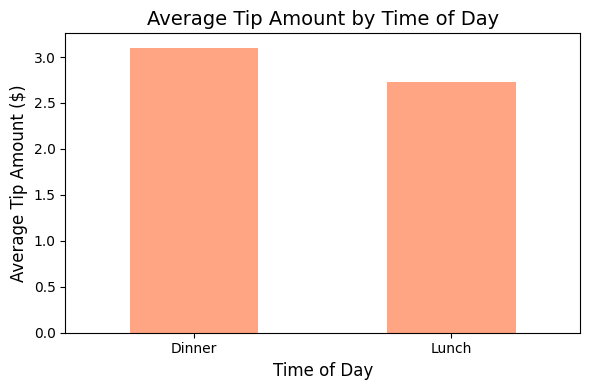

In [54]:
avg_tip_by_time = df.groupby('time')['tip'].mean()

plt.figure(figsize=(6, 4))
avg_tip_by_time.plot(kind='bar', color='coral', alpha=0.7)  
plt.title('Average Tip Amount by Time of Day', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Tip Amount ($)', fontsize=12)
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()


The tip given during dinner time is significantly higher than that during lunch. This could be due to several factors such as larger group sizes, higher total bills, or more generous tipping behaviors at dinner time compared to lunch. Dinner tends to attract more formal dining settings, where customers may spend more and tip accordingly. Additionally, restaurants may also offer more upscale or special menus during dinner, which could contribute to higher spending and, consequently, higher tips. This trend highlights the potential differences in customer behavior between lunch and dinner hours.

**Conclusion**

- **Higher Tips for Bills Over 25**: Focus on selling more products in this price range to boost tips.
- **Group Bookings of 3-4 People**: Arrange group bookings for higher tips.
- **Special Offers on Weekends**: Offer promotions on weekends to increase tips.
- **Male Customers Provide More Tips**: Strategize to attract more male customers.
- **Enhance Dinner Time Experience**: Improve dinner-time services for higher tips.
